In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [4]:
df.shape

(768, 7)

In [5]:
df.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [6]:
df.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [7]:
df = df.dropna()

In [8]:
df.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

In [9]:
df.shape

(740, 7)

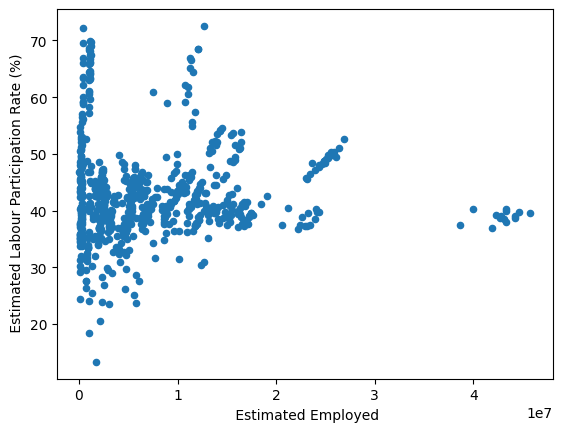

In [10]:
df.plot(kind = 'scatter', x = ' Estimated Employed', y = ' Estimated Labour Participation Rate (%)')
plt.show()

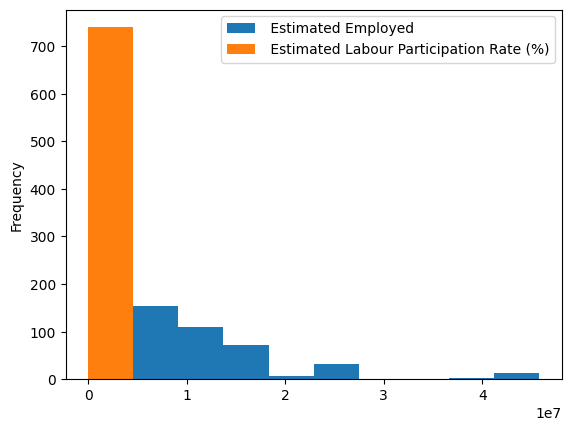

In [11]:
df.plot(kind='hist', x= ' Estimated Unemployment Rate (%)')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

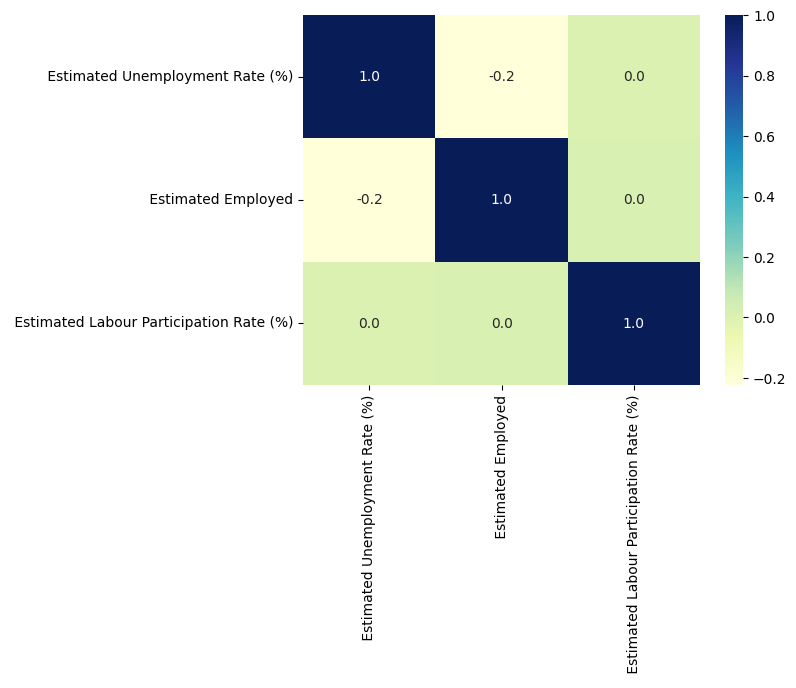

In [12]:
sns.heatmap(df.corr(), annot=True, fmt = '0.1f', cmap = 'YlGnBu')
plt.show

In [13]:
x = df[[' Estimated Employed', ' Estimated Labour Participation Rate (%)']]
y = df[' Estimated Unemployment Rate (%)']

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [16]:
x_train.shape

(555, 2)

In [17]:
x_test.shape

(185, 2)

In [18]:
y_train.shape

(555,)

In [19]:
y_test.shape

(185,)

In [20]:
from sklearn.ensemble import RandomForestRegressor

In [21]:
rg = RandomForestRegressor()

In [22]:
rg.fit(x_train,y_train)

RandomForestRegressor()

In [23]:
y_pred = rg.predict(x_test)

In [24]:
from sklearn.metrics import r2_score

In [25]:
r2_score(y_test,y_pred)

0.2610708809273574

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
lr = LinearRegression()

In [28]:
lr.fit(x_train,y_train)

LinearRegression()

In [29]:
y_pred2 = lr.predict(x_test)

In [30]:
r2_score(y_test,y_pred2)

0.027954120721310316

In [31]:
import xgboost as xgb

In [32]:
xgb_model = xgb.XGBRegressor(objective="reg:linear", random_state=42)

xgb_model.fit(x_train, y_train)

y_pred3 = xgb_model.predict(x_test)


[16:10:25] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


In [33]:
r2_score(y_test,y_pred3)

0.07691049918548798

In [34]:
#random forest is having best accuracy among these

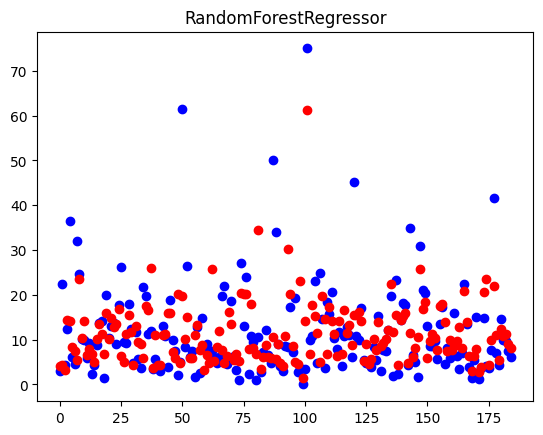

In [35]:
plt.scatter(range(len(y_test)), y_test, color='blue')
plt.scatter(range(len(y_pred)), y_pred, color='red')
plt.title('RandomForestRegressor')
plt.show()